# ONTARIO Population COVID-19 Data set from: 
[data.ontario.ca](https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario)

### Import Required LIbraries

In [57]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

%matplotlib inline

### Import the data set from a url

In [58]:
url = 'https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'

df = pd.read_csv(url)

df.tail()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
107878,107879,2020-09-28,2020-10-04,2020-10-04,2020-09-29,20s,FEMALE,CC,Resolved,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
107879,107880,2020-10-31,2020-11-02,2020-11-02,2020-10-31,20s,FEMALE,CC,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
107880,107881,2020-10-31,2020-11-02,2020-11-02,2020-10-31,60s,MALE,CC,Resolved,NaN,2230,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341
107881,107882,2020-11-01,2020-11-06,2020-11-06,2020-11-04,30s,FEMALE,No known epi link,Resolved,NaN,2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
107882,107883,2020-11-19,2020-11-21,2020-11-21,2020-11-19,60s,FEMALE,CC,Not Resolved,NaN,2246,Niagara Region Public Health Department,1815 Sir Isaac Brock Way,Thorold,L2V 4T7,www.niagararegion.ca/health,43.116537,-79.241220


In [59]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))
print(max(df['Test_Reported_Date']))

2020-01-27 00:00:00
2020-11-24 00:00:00


## Filter the Test Reported Date to June 1, 2020 > Last Reported Date

In [60]:
start_date = '2020-06-01'
df = df[df['Test_Reported_Date'] >= start_date] 

In [61]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))
print(max(df['Test_Reported_Date']))

2020-06-01 00:00:00
2020-11-24 00:00:00


In [62]:
df['Age_Group'].unique()

array(['50s', '90s', '60s', '40s', '20s', '70s', '<20', '30s', '80s', nan,
       'UNKNOWN'], dtype=object)

In [63]:
df_age20andbelow = df[df['Age_Group'] == '<20']

In [64]:
df2 = df_age20andbelow[["Test_Reported_Date", "Age_Group", "Reporting_PHU_City"]]

In [65]:
df2.head()

,Test_Reported_Date,Age_Group,Reporting_PHU_City
12,2020-11-11,<20,Mississauga
16,2020-09-29,<20,Barrie
17,2020-09-22,<20,Newmarket
22,2020-11-11,<20,Mississauga
41,2020-10-18,<20,Mississauga


In [66]:
df2["Case"] = 1
df2 = df2.loc[:, ['Test_Reported_Date', 'Case']]
df2.head()

C:\Users\P\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Test_Reported_Date,Case
12,2020-11-11,1
16,2020-09-29,1
17,2020-09-22,1
22,2020-11-11,1
41,2020-10-18,1


In [67]:
df3 = df2.groupby(['Test_Reported_Date'])['Case'].agg('sum')
df3.tail(5)

Test_Reported_Date
2020-11-20    295
2020-11-21    179
2020-11-22    183
2020-11-23    174
2020-11-24     70
Name: Case, dtype: int64

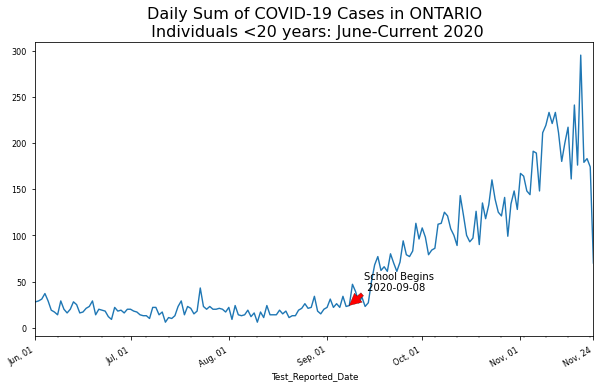

In [68]:
xpos = '2020-09-08'
ypos = df3.loc['2020-09-08']


plt.figure(figsize=(10,6))
plt.style.use(['default', 'seaborn-paper'])

df3.plot()
plt.title("Daily Sum of COVID-19 Cases in ONTARIO\n Individuals <20 years: June-Current 2020",
         fontsize=16)

plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d')
# Get Current Axis
plt.gca().xaxis.set_major_formatter(date_format)

plt.annotate(f"School Begins \n {xpos}", xy = (xpos, ypos), xytext=(15, 15),
            textcoords='offset points',
            arrowprops = dict(facecolor='red'))

plt.show()

In [69]:
datetime_index = pd.DatetimeIndex(df2.Test_Reported_Date.values)
df4 = df2.set_index(datetime_index)
df4.drop('Test_Reported_Date', axis=1, inplace=True)
df4 = df4.sort_index()
df4.tail()

,Case
2020-11-24,1
2020-11-24,1
2020-11-24,1
2020-11-24,1
2020-11-24,1


In [70]:
weekly_sum = df4['Case'].resample("W").sum()
weekly_sum.tail()

2020-11-01     938
2020-11-08    1195
2020-11-15    1497
2020-11-22    1452
2020-11-29     244
Freq: W-SUN, Name: Case, dtype: int64

<AxesSubplot:>

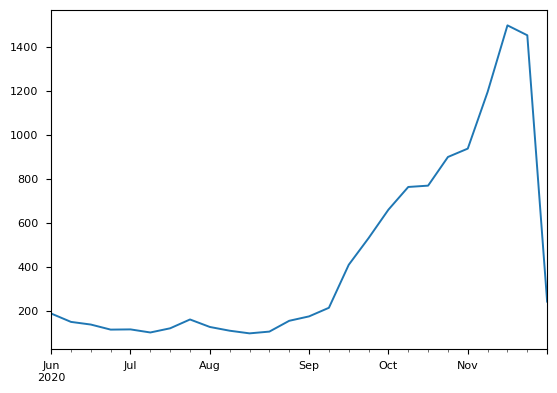

In [71]:
weekly_sum.plot()

In [72]:
df5 = df4.groupby(df4.index)['Case'].sum()

In [73]:
df5.head()

2020-06-01    28
2020-06-02    29
2020-06-03    31
2020-06-04    37
2020-06-05    29
Name: Case, dtype: int64

<AxesSubplot:>

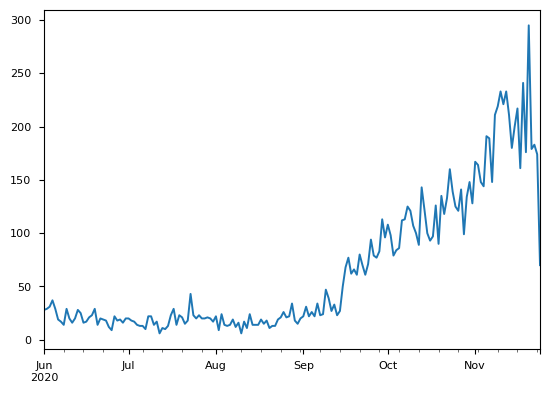

In [74]:
df5.plot()

In [75]:
df2.sort_values("Test_Reported_Date", inplace=True)
datetime_index = pd.DatetimeIndex(df2.Test_Reported_Date.values)
df2 = df2.set_index(datetime_index)
#df2.drop('Test_Reported_Date', inplace=True)
df2.head()

,Test_Reported_Date,Case
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1


In [76]:
#df2 = df2.drop(['Test_Reported_Date'], axis=1)
df2.head()

,Test_Reported_Date,Case
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1


<AxesSubplot:>

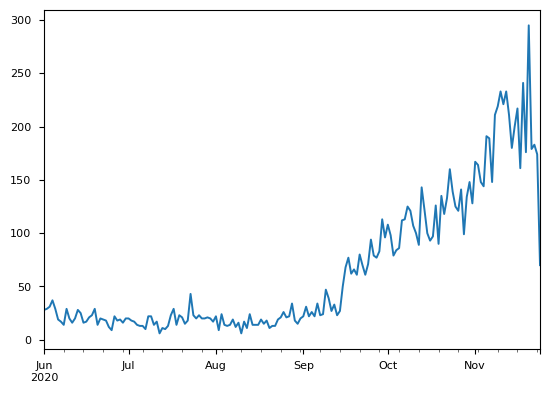

In [77]:
#df5 = pd.DataFrame(df5)
daily_sum= df2['Case'].resample("D").sum()
daily_sum.plot()

<AxesSubplot:>

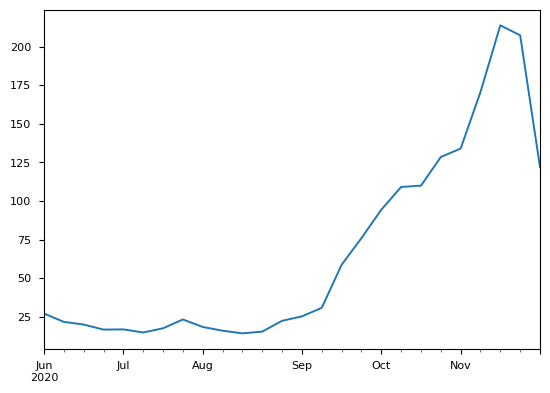

In [78]:
weekly_mean = daily_sum.resample("W").mean()
weekly_mean.plot()

In [79]:
daily_sum.tail()

2020-11-20    295
2020-11-21    179
2020-11-22    183
2020-11-23    174
2020-11-24     70
Freq: D, Name: Case, dtype: int64

In [80]:
weekly_mean.tail()

2020-11-01    134.000000
2020-11-08    170.714286
2020-11-15    213.857143
2020-11-22    207.428571
2020-11-29    122.000000
Freq: W-SUN, Name: Case, dtype: float64

In [86]:
print(type(weekly_sum))


<class 'pandas.core.series.Series'>


## Save the three data frames (daily_sum, weekly_mean, weekly_sum) to CSV files

In [87]:
daily_sum.to_csv("less_than_20_daily_sum_COVID19.csv", index_label="Reported_date")

In [88]:
weekly_mean.to_csv("less_than_20_weekly_mean_COVID19.csv", index_label="Reported_date")

In [89]:
weekly_sum.to_csv("less_than_20_weekly_sum_COVID19.csv", index_label="Reported_date")